In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

### Reading and handling of airpassenger datasets

In [3]:
data = pd.read_csv('AirPassengers.csv')

print(data.head())
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
Month          object
#Passengers     int64
dtype: object


In [6]:
# The data contains a particular month and number of passengers travelling in that month. 
#In order to read the data as a time series, we have to pass special arguments to the 
#read_csv command:
date_parse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month',date_parser=date_parse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
ts = data['#Passengers']
ts.head(12)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [12]:
# Year wise get the data
ts['1949-01-01': '1949-12-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [13]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

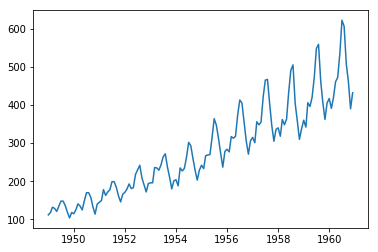

In [15]:
import matplotlib.pyplot as plt
plt.plot(ts)

In [16]:
# Rolling statistics plot and Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

In [32]:
def test_stationary(timeseries):
    #determine the rolling stationary
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label= 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    
    # perform Dickey-fuller test
    print('Dickey-fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    #print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

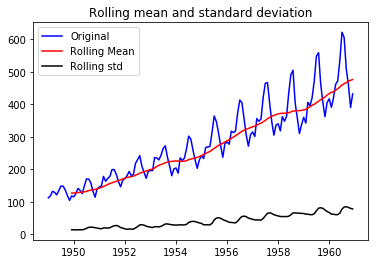

Dickey-fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
test_stationary(ts)

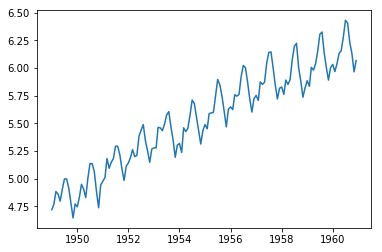

In [34]:
# transformation of data to reduce the trend
ts_log = np.log(ts)
plt.plot(ts_log)

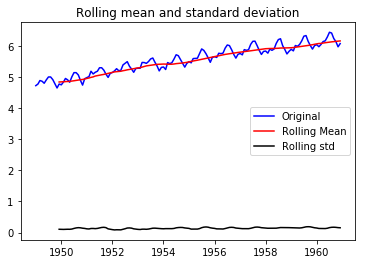

Dickey-fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [35]:
test_stationary(ts_log)

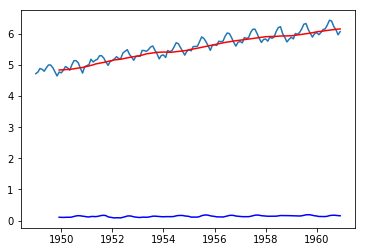

In [36]:
moving_avg = ts_log.rolling(12).mean()
mov_avg_std = ts_log.rolling(12).std()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.plot(mov_avg_std, color='blue')

In [37]:
moving_avg

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01    4.836178
1950-01-01    4.838381
1950-02-01    4.843848
1950-03-01    4.849344
1950-04-01    4.853133
1950-05-01    4.855843
1950-06-01    4.864066
1950-07-01    4.875614
1950-08-01    4.887163
1950-09-01    4.899658
1950-10-01    4.908927
1950-11-01    4.916578
1950-12-01    4.930824
1951-01-01    4.950141
1951-02-01    4.964670
1951-03-01    4.984089
1951-04-01    4.999795
1951-05-01    5.026394
1951-06-01    5.041214
                ...   
1958-07-01    5.919627
1958-08-01    5.926146
1958-09-01    5.926146
1958-10-01    5.928980
1958-11-01    5.930335
1958-12-01    5.930582
1959-01-01    5.935346
1959-02-01    5.941409
1959-03-01    5.950968
1959-04-01    5.961736
1959-05-01    5.973890
1959-06-01    5.980693
1959-

In [38]:
print(ts_log)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
1949-11-01    4.644391
1949-12-01    4.770685
1950-01-01    4.744932
1950-02-01    4.836282
1950-03-01    4.948760
1950-04-01    4.905275
1950-05-01    4.828314
1950-06-01    5.003946
1950-07-01    5.135798
1950-08-01    5.135798
1950-09-01    5.062595
1950-10-01    4.890349
1950-11-01    4.736198
1950-12-01    4.941642
1951-01-01    4.976734
1951-02-01    5.010635
1951-03-01    5.181784
1951-04-01    5.093750
1951-05-01    5.147494
1951-06-01    5.181784
                ...   
1958-07-01    6.196444
1958-08-01    6.224558
1958-09-01    6.001415
1958-10-01    5.883322
1958-11-01    5.736572
1958-12-01    5.820083
1959-01-01    5.886104
1959-02-01    5.834811
1959-03-01    6.006353
1959-04-01    5.981414
1959-05-01    6.040255
1959-06-01    6.156979
1959-

In [39]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [41]:
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [42]:
ts_log_moving_avg_diff.dropna(inplace=True)

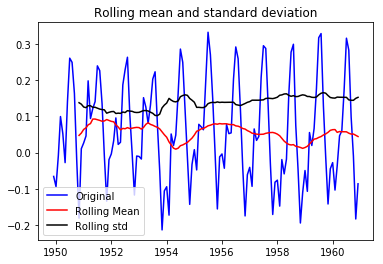

Dickey-fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [43]:
test_stationary(ts_log_moving_avg_diff)

Month
1949-01-01    4.718499
1949-02-01    4.745635
1949-03-01    4.795062
1949-04-01    4.813242
1949-05-01    4.809172
1949-06-01    4.828556
1949-07-01    4.858800
1949-08-01    4.881315
1949-09-01    4.886010
1949-10-01    4.871085
1949-11-01    4.841297
1949-12-01    4.832498
Name: #Passengers, dtype: float64

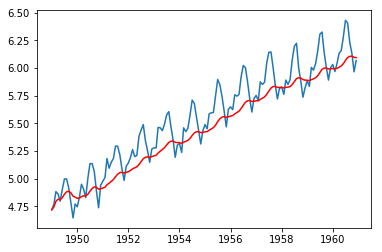

In [45]:
#Weighted moving average.One technique is to add the weightage is exponentally weighted moving average

expweighted_avg = ts_log.ewm(12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')
expweighted_avg.head(12)

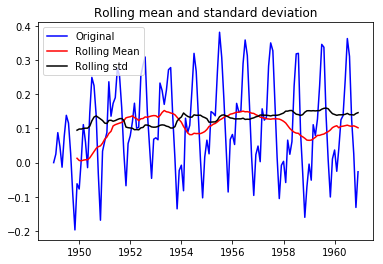

Dickey-fuller Test:
Test Statistic                  -3.566092
p-value                          0.006443
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [46]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationary(ts_log_ewma_diff)

### Eliminating Trend and Seasonality


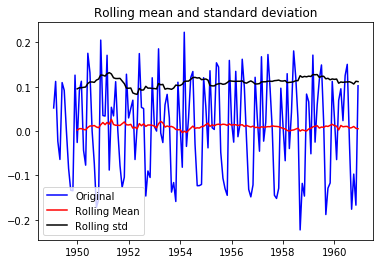

Dickey-fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [48]:
# Differencing
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.head()
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff)

In [49]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

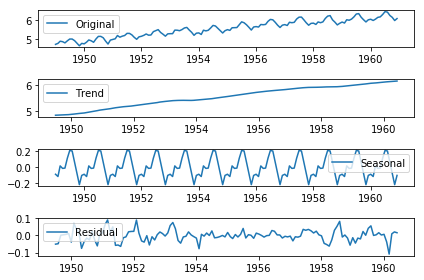

In [52]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

In [53]:
ts_log_decompose = residual
ts_log_decompose.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

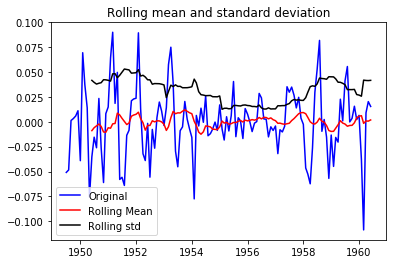

Dickey-fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [55]:
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)